In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
import neurokit

In [2]:
data_tb = pd.read_csv('intern_dataset.csv')
data_tb.head(20)

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A
5,2017-08-14 11:37:49.841,28066.378446,0.856607,A
6,2017-08-14 11:37:49.851,26910.094146,0.856579,A
7,2017-08-14 11:37:49.861,25736.387974,0.856550,A
8,2017-08-14 11:37:49.871,24545.389112,0.856518,A
9,2017-08-14 11:37:49.881,23339.584544,0.856486,A


In [3]:
(data_tb['Label'] == 'A').sum()

318000

In [4]:
data_tb.shape

(912000, 4)

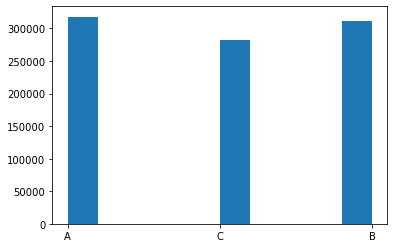

In [5]:
hist_total = plt.hist(data_tb['Label'])

In [6]:
data_tb.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [7]:
data_tb.isna().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

In [8]:
data_tb

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A
...,...,...,...,...
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,C
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,C
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,C
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,C


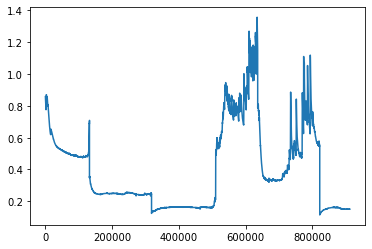

In [9]:
plt.plot(data_tb.Signal2)

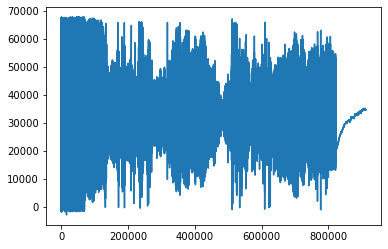

In [10]:
plt.plot(data_tb.Signal1)

(array([  9799.,  22992.,  70381., 167478., 253985., 187626., 102661.,
         60634.,  21381.,  15063.]),
 array([-2934.32832683,  4128.36970802, 11191.06774287, 18253.76577772,
        25316.46381257, 32379.16184742, 39441.85988227, 46504.55791711,
        53567.25595196, 60629.95398681, 67692.65202166]),
 <a list of 10 Patch objects>)

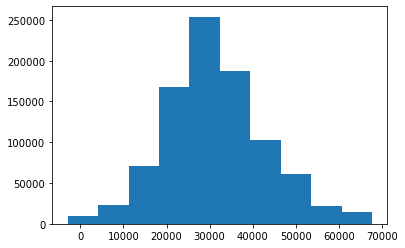

In [11]:
plt.hist(data_tb.Signal1)

(array([282430., 247749.,  68902., 128416.,  51606.,  79875.,  23429.,
         18100.,   9280.,   2213.]),
 array([0.11384072, 0.23805858, 0.36227644, 0.48649429, 0.61071215,
        0.73493001, 0.85914787, 0.98336573, 1.10758359, 1.23180144,
        1.3560193 ]),
 <a list of 10 Patch objects>)

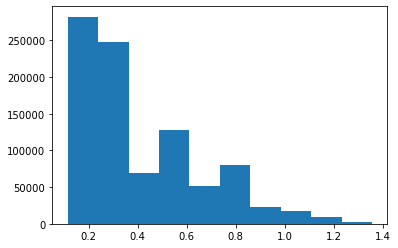

In [12]:
plt.hist(data_tb.Signal2)

In [13]:
relation_A = data_tb.loc[(data_tb.Label == 'A')]
relation_A.shape

(318000, 4)

In [14]:
relation_B = data_tb.loc[(data_tb.Label == 'B')]
relation_B.shape

(312000, 4)

In [15]:
relation_C = data_tb.loc[(data_tb.Label == 'C')]
relation_C.shape

(282000, 4)

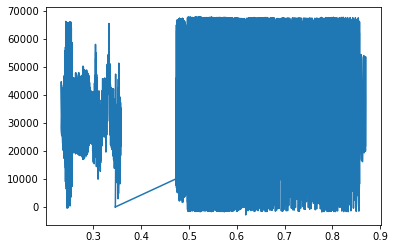

In [16]:
plt.plot(relation_A['Signal2'],relation_A['Signal1'])

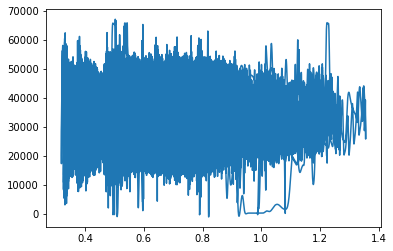

In [17]:
plt.plot(relation_B['Signal2'],relation_B['Signal1'])

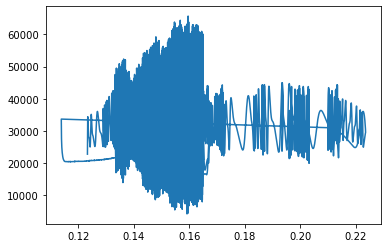

In [18]:
plt.plot(relation_C['Signal2'],relation_C['Signal1'])

# Implementation of Time Series 

In [19]:
relation_C

,Time,Signal1,Signal2,Label
318000,2017-08-12 11:08:25.785,22719.403196,0.123263,C
318001,2017-08-12 11:08:25.795,23608.265317,0.123268,C
318002,2017-08-12 11:08:25.805,24524.544926,0.123273,C
318003,2017-08-12 11:08:25.815,25479.836092,0.123279,C
318004,2017-08-12 11:08:25.825,26475.848059,0.123285,C
...,...,...,...,...
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,C
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,C
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,C
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,C


In [20]:
relation_A['Time'] = pd.to_datetime(relation_A['Time'])
relation_B['Time'] = pd.to_datetime(relation_B['Time'])
relation_C['Time'] = pd.to_datetime(relation_C['Time'])

<ipython-input-20-6ea7a28e3b8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_A['Time'] = pd.to_datetime(relation_A['Time'])
<ipython-input-20-6ea7a28e3b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_B['Time'] = pd.to_datetime(relation_B['Time'])
<ipython-input-20-6ea7a28e3b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [21]:
Indexed_A = relation_A.set_index('Time')
Indexed_B = relation_B.set_index('Time')
Indexed_C = relation_C.set_index('Time')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8433B88E0>,
      dtype=object)

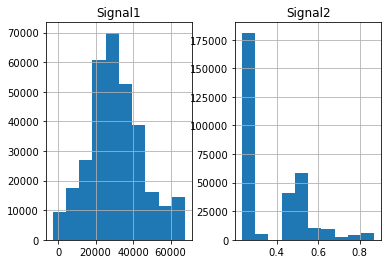

In [24]:
Indexed_A.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8463A1100>,
      dtype=object)

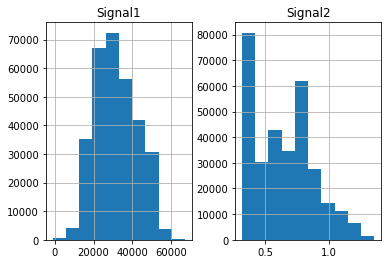

In [25]:
Indexed_B.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8465F9490>,
      dtype=object)

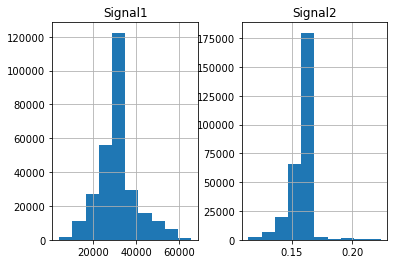

In [26]:
Indexed_C.hist()

In [27]:
Indexed_C.sh

,Signal1,Signal2,Label
Time,,,
2017-08-12 11:08:25.785,22719.403196,0.123263,C
2017-08-12 11:08:25.795,23608.265317,0.123268,C
2017-08-12 11:08:25.805,24524.544926,0.123273,C
2017-08-12 11:08:25.815,25479.836092,0.123279,C
2017-08-12 11:08:25.825,26475.848059,0.123285,C
...,...,...,...
2020-01-04 10:55:49.186,34673.811155,0.151395,C
2020-01-04 10:55:49.196,34672.951723,0.151385,C
2020-01-04 10:55:49.206,34671.967555,0.151373,C


# Augumented Dickey Fuller Test

In [29]:
#H0: It is not stationary   
#H1: It is stationary

def adfuller_test(Label):   
    result = adfuller(Label)   
    labels = ['ADF Test Statistic','P-Value','#Lags Used','No. of Observations']   
    for value, label in zip(result,labels):   
        print(label+' : '+str(value))   
    if result[1] <= 0.05:   
        print('We will reject the null hypothesis ')   
    else:   
        print('We accept Null hypothesis ')

In [30]:
adfuller_test(Indexed_A.Signal1)

ADF Test Statistic : -31.786633226136356
P-Value : 0.0
#Lags Used : 91
No. of Observations : 317908
We will reject the null hypothesis 


In [45]:
adfuller_test(Indexed_B.Signal1)

ADF Test Statistic : -28.646979330528183
P-Value : 0.0
#Lags Used : 90
No. of Observations : 311909
We will reject the null hypothesis 


In [34]:
adfuller_test(Indexed_C.Signal1)

ADF Test Statistic : -11.792892820554673
P-Value : 9.731390897295029e-22
#Lags Used : 88
No. of Observations : 281911
We will reject the null hypothesis 


Here is the output of the Augmented Dickey-Fuller test for Signal 1 for Labels A,B,C over the period.
Considering the p-value which is =<0.05 we can conclude that the data is stationary by rejecting the Null Hypothesis 

In [46]:
adfuller_test(Indexed_A.Signal2)

ADF Test Statistic : -3.0803195592599537
P-Value : 0.028044328323556564
#Lags Used : 0
No. of Observations : 317999
We will reject the null hypothesis 


In [49]:
adfuller_test(Indexed_B.Signal2)

ADF Test Statistic : -3.069415647690563
P-Value : 0.028900929999274082
#Lags Used : 83
No. of Observations : 311916
We will reject the null hypothesis 


In [35]:
adfuller_test(Indexed_C.Signal2)

ADF Test Statistic : -5.512249152842254
P-Value : 1.9602395028152085e-06
#Lags Used : 0
No. of Observations : 281999
We will reject the null hypothesis 


Here is the output of the Augmented Dickey-Fuller test for Signal 2 for Label A,B,C over the period. Here as well we can see that the values are stationary and rejecting the null hypothesis

# Hurst exponent using Rescaled range (R/S) analysis

In [50]:
H, c, data = compute_Hc(Indexed_C.Signal1, kind='price', simplified=True)
H,c

(0.25256451078241765, 25.154515370249303)

H = 0.5 — Brownian motion,    
0.5 < H < 1.0 — persistent behavior,  
0 < H < 0.5 — anti-persistent behavior.

The Hurst Exponent has a anti-persistant behaviour for C Label in Signal1

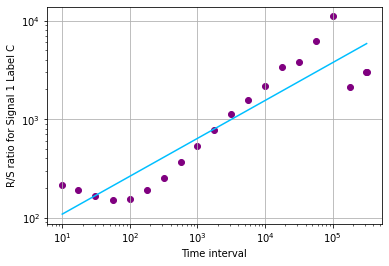

In [48]:
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio for Signal 1 Label C')
ax.grid(True)
plt.show()

In [51]:
H, c, data = compute_Hc(Indexed_C.Signal2, kind='price', simplified=True)

H,c

(0.39723816567356135, 24.029025156946933)

H = 0.5 — Brownian motion,    
0.5 < H < 1.0 — persistent behavior,  
0 < H < 0.5 — anti-persistent behavior.

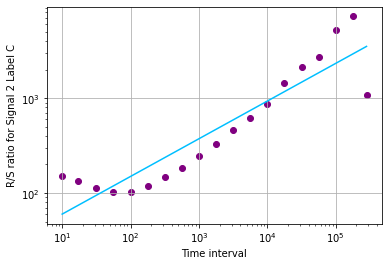

In [52]:
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio for Signal 2 Label C')
ax.grid(True)
plt.show()

In [53]:
H, c, data = compute_Hc(Indexed_B.Signal2, kind='price', simplified=True)

H,c

(0.2631565407513882, 261.98971291132966)

H = 0.5 — Brownian motion,   
0.5 < H < 1.0 — persistent behavior,   
0 < H < 0.5 — anti-persistent behavior.   

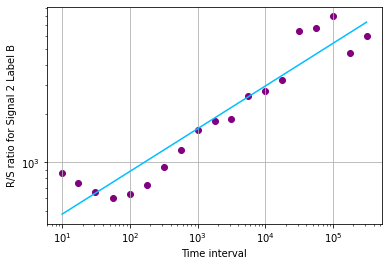

In [54]:
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio for Signal 2 Label B')
ax.grid(True)
plt.show()

In [55]:
H, c, data = compute_Hc(Indexed_A.Signal2, kind='price', simplified=True)
H,c

(0.3847592361991306, 44.63515534037286)

H = 0.5 — Brownian motion,   
0.5 < H < 1.0 — persistent behavior,   
0 < H < 0.5 — anti-persistent behavior.   

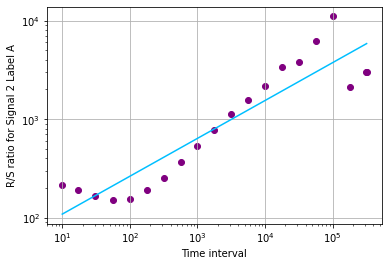

In [56]:
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio for Signal 2 Label A')
ax.grid(True)
plt.show()

# Checking the complexity

In [ ]:
#neurokit.complexity(data, sampling_rate=1000, shannon=True, sampen=True, multiscale=True, spectral=True, svd=True, correlation=True, higushi=True, petrosian=True, fisher=True, hurst=True, dfa=True, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

**Fractal dimension**: The term fractal was first introduced by Mandelbrot in 1983. A fractal is a set of points that when looked at smaller scales, resembles the whole set. The concept of fractak dimension (FD) originates from fractal geometry. In traditional geometry, the topological or Euclidean dimension of an object is known as the number of directions each differential of the object occupies in space. This definition of dimension works well for geometrical objects whose level of detail, complexity or space-filling is the same. However, when considering two fractals of the same topological dimension, their level of space-filling is different, and that information is not given by the topological dimension. The FD emerges to provide a measure of how much space an object occupies between Euclidean dimensions. The FD of a waveform represents a powerful tool for transient detection. This feature has been used in the analysis of ECG and EEG to identify and distinguish specific states of physiologic function. Many algorithms are available to determine the FD of the waveform (Acharya, 2005).
Correlation: A measure of the fractal (or correlation) dimension of a time series which is also related to complexity. The correlation dimension is a characteristic measure that can be used to describe the geometry of chaotic attractors. It is defined using the correlation sum C(r) which is the fraction of pairs of points X_i in the phase space whose distance is smaller than r.    
**Higushi**: Higuchi proposed in 1988 an efficient algorithm for measuring the FD of discrete time sequences. As the reconstruction of the attractor phase space is not necessary, this algorithm is simpler and faster than D2 and other classical measures derived from chaos theory. FD can be used to quantify the complexity and self-similarity of a signal. HFD has already been used to analyse the complexity of brain recordings and other biological signals.     
Petrosian Fractal Dimension: Provide a fast computation of the FD of a signal by translating the series into a binary sequence.

In [51]:
neurokit.complexity(Indexed_A.Signal1, sampling_rate=100000, shannon=False, sampen=False, multiscale=False, spectral=False, svd=False, correlation=False, higushi=True, petrosian=True, fisher=False, hurst=True, dfa=False, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'Fractal_Dimension_Higushi': 1.008170641396176,
 'Fractal_Dimension_Petrosian': 1.0007560408840421,
 'Hurst': 0.5747595732623282}

The complexity of Label A w.r.t Signal 1 is given below :   
'Fractal_Dimension_Higushi': 1.008170641396176   
'Fractal_Dimension_Petrosian': 1.0007560408840421   
'Hurst': 0.5747595732623282   

In [52]:
neurokit.complexity(Indexed_B.Signal1, sampling_rate=100000, shannon=False, sampen=False, multiscale=False, spectral=False, svd=False, correlation=False, higushi=True, petrosian=True, fisher=False, hurst=True, dfa=False, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'Fractal_Dimension_Higushi': 1.0121944743109923,
 'Fractal_Dimension_Petrosian': 1.0008522585864967,
 'Hurst': 0.6082193903732962}

The complexity of Label B w.r.t Signal 1 is given below :   
'Fractal_Dimension_Higushi': 1.0121944743109923    
'Fractal_Dimension_Petrosian': 1.0008522585864967   
'Hurst': 0.6082193903732962   

In [31]:
neurokit.complexity(Indexed_C.Signal1, sampling_rate=100000, shannon=False, sampen=False, multiscale=False, spectral=False, svd=False, correlation=False, higushi=True, petrosian=True, fisher=False, hurst=True, dfa=False, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'Fractal_Dimension_Higushi': 1.0137410381086305,
 'Fractal_Dimension_Petrosian': 1.0008960077130644,
 'Hurst': 0.8292981622514977}

The values of Higushi Petrosian and Hurst Exponent for Signal1 in Label C is given below :  
'Fractal_Dimension_Higushi': 1.0137410381086305   
'Fractal_Dimension_Petrosian': 1.0008960077130644   
'Hurst': 0.8292981622514977   
DFA can be ignored as it works well on Non-Stationary data i.e mean and variance is not constant   

In [53]:
neurokit.complexity(Indexed_A.Signal2, sampling_rate=100000, shannon=False, sampen=False, multiscale=False, spectral=False, svd=False, correlation=False, higushi=True, petrosian=True, fisher=False, hurst=True, dfa=False, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'Fractal_Dimension_Higushi': 1.0010244385931724,
 'Fractal_Dimension_Petrosian': 1.0004396724685132,
 'Hurst': 0.9436455006528913}

In [54]:
neurokit.complexity(Indexed_B.Signal2, sampling_rate=100000, shannon=False, sampen=False, multiscale=False, spectral=False, svd=False, correlation=False, higushi=True, petrosian=True, fisher=False, hurst=True, dfa=False, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'Fractal_Dimension_Higushi': 1.0001446685116777,
 'Fractal_Dimension_Petrosian': 1.0001421762681924,
 'Hurst': 0.9656017582527003}

In [32]:
neurokit.complexity(Indexed_C.Signal2, sampling_rate=100000, shannon=False, sampen=False, multiscale=False, spectral=False, svd=False, correlation=False, higushi=True, petrosian=True, fisher=False, hurst=True, dfa=False, lyap_r=False, lyap_e=False, emb_dim=2, tolerance='default', k_max=8, bands=None, tau=1)

C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'Fractal_Dimension_Higushi': 1.00190364755128,
 'Fractal_Dimension_Petrosian': 1.0004835341077232,
 'Hurst': 0.8748319171563598}

The values of Higushi Petrosian and Hurst Exponent for Signal2 in Label C is given below :   
'Fractal_Dimension_Higushi': 1.00190364755128   
'Fractal_Dimension_Petrosian': 1.0004835341077232   
'Hurst': 0.8748319171563598   

**Thus we can conclude that from the given data by looking at all the complexity parameters and taking the average of each of the parameters in Labels A,B,C   
Label C shows more complexity compared to Labels A and B**